In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
training_data = pd.read_csv('../data/CW1_train.csv')
test_data = pd.read_csv('../data/CW1_test.csv')

print(f"Training data: {training_data.shape}")                                                                                                                                                             
print(f"Test data: {test_data.shape}")  

Training data: (10000, 31)
Test data: (1000, 30)


In [3]:

training_columns = training_data.columns.tolist()

print("Training data shape:", training_data.shape)
print("columns:", training_columns)

training_data.head()

Training data shape: (10000, 31)
columns: ['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [4]:
print("Test data shape:", test_data.shape)
print("columns:", test_data.columns.tolist())
test_data.head()

Test data shape: (1000, 30)
columns: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


,carat,cut,color,clarity,depth,table,price,x,y,z,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,0.39,Ideal,I,VVS2,60.8,56.0,849,4.74,4.76,2.89,...,-0.321856,0.779133,0.146287,-0.658241,-1.899234,-0.973046,-0.145955,-0.597933,0.915728,0.498678
1,1.02,Premium,H,VS1,62.1,59.0,5569,6.43,6.38,3.98,...,0.249352,-0.698167,0.499753,0.524907,-0.672549,-0.505678,-2.761345,-2.434193,-1.303742,-1.239320
2,0.74,Ideal,G,SI1,61.6,55.0,2760,5.80,5.85,3.59,...,-0.353650,1.057552,1.111710,2.888994,1.489588,0.456911,-0.010021,-1.211698,0.781882,-0.327432
3,0.50,Ideal,G,VVS2,62.3,56.0,1935,5.09,5.05,3.16,...,0.822115,-0.663203,-0.500939,-1.383690,-1.828773,-1.344145,-1.411683,-1.866323,-2.157749,0.341636
4,1.04,Good,E,SI1,63.8,58.0,5766,6.46,6.39,4.10,...,0.600818,-0.187732,0.239685,0.790332,0.619964,-0.182362,1.342525,1.032296,1.402299,1.165052


The training set contains 10,000 observations and 30 features, while the test set contains 1,000 observations with an identical feature schema, excluding the target variable.

The dataset appears well-structured, with clean categorical labels and continuous numerical features. Let's check that further:

# Missingness & data quality

**- Training Data**

In [5]:
 # check for null/na values
null_counts = training_data.isnull().sum()
total_rows = len(training_data)

missing_data = pd.DataFrame({
    'null_count': null_counts,
    'null_percent': (null_counts / total_rows) * 100
})

missing_only = missing_data[missing_data['null_count'] > 0].sort_values('null_count', ascending=False)

if len(missing_only) > 0:
    fig, axes = plt.subplots(1,2, figsize=(14, 5))

    missing_only['null_count'].plot.bar(ax=axes[0], color='skyblue')
    axes[0].set_title('Missing Data Count by Column')
    axes[0].set_ylabel('Count of Missing Values')
    axes[0].set_xlabel('Columns')
    axes[0].tick_params(axis='x', rotation=45)

    missing_only['null_percent'].plot.bar(ax=axes[1], color='salmon')
    axes[1].set_title('Missing Data Percentage by Column')
    axes[1].set_ylabel('Percentage of Missing Values')
    axes[1].set_xlabel('Columns')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

  # Sumarry                                                                                                                                                                                           
    print(f"\nDataset shape: {training_data.shape[0]} rows, {training_data.shape[1]} columns")                                                                                                                          
    print(f"Columns with missing data: {len(missing_only)}/{len(missing_data)}\n")                                                                                                                                      
    print(missing_only.to_string())                                                                                                                                                                                     
else:                                                                                                                                                                                                                   
    print("No missing data found in the dataset.")               

No missing data found in the dataset.


No missing values were observed; however, imputation was included in the preprocessing pipeline to ensure robustness at test time.

**- Test Data** 

In [6]:
 # check for null/na values
null_counts = test_data.isnull().sum()
total_rows = len(test_data)

missing_data = pd.DataFrame({
    'null_count': null_counts,
    'null_percent': (null_counts / total_rows) * 100
})

missing_only = missing_data[missing_data['null_count'] > 0].sort_values('null_count', ascending=False)

if len(missing_only) > 0:
    fig, axes = plt.subplots(1,2, figsize=(14, 5))

    missing_only['null_count'].plot.bar(ax=axes[0], color='skyblue')
    axes[0].set_title('Missing Data Count by Column')
    axes[0].set_ylabel('Count of Missing Values')
    axes[0].set_xlabel('Columns')
    axes[0].tick_params(axis='x', rotation=45)

    missing_only['null_percent'].plot.bar(ax=axes[1], color='salmon')
    axes[1].set_title('Missing Data Percentage by Column')
    axes[1].set_ylabel('Percentage of Missing Values')
    axes[1].set_xlabel('Columns')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

  # Sumarry                                                                                                                                                                                           
    print(f"\nDataset shape: {test_data.shape[0]} rows, {test_data.shape[1]} columns")                                                                                                                          
    print(f"Columns with missing data: {len(missing_only)}/{len(missing_data)}\n")                                                                                                                                      
    print(missing_only.to_string())                                                                                                                                                                                     
else:                                                                                                                                                                                                                   
    print("No missing data found in the dataset.")               

No missing data found in the dataset.


No missing values were observed; however, imputation was included in the preprocessing pipeline to ensure robustness at test time.

# Target Behaviour Analysis

**- Training Data**

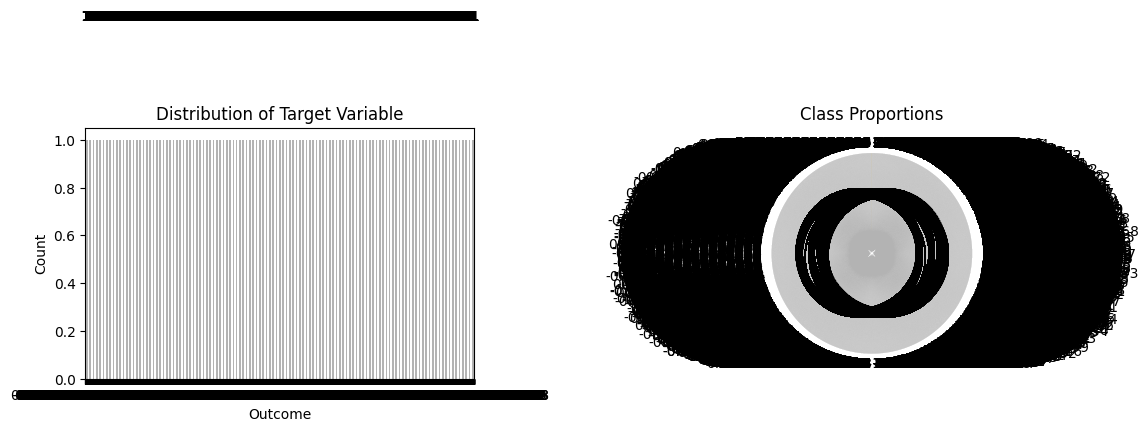

Target Variable Summary:
            count  percentage
outcome                      
-26.701232      1        0.01
 6.548093       1        0.01
 6.612562       1        0.01
-5.073562       1        0.01
-14.436557      1        0.01
 5.613434       1        0.01
 19.709748      1        0.01
-1.408018       1        0.01
-12.536959      1        0.01
-17.293657      1        0.01
 13.515989      1        0.01
 9.362145       1        0.01
 10.057854      1        0.01
 2.312261       1        0.01
-8.893692       1        0.01
-9.447359       1        0.01
 3.070322       1        0.01
-18.864651      1        0.01
 13.245382      1        0.01
-15.917282      1        0.01
 3.805904       1        0.01
-10.105942      1        0.01
 7.706903       1        0.01
 16.026196      1        0.01
-8.082555       1        0.01
-18.006745      1        0.01
 4.980825       1        0.01
-7.306641       1        0.01
 0.687376       1        0.01
 4.992672       1        0.01
 11.218938     

In [7]:
outcomes = training_data['outcome']                                                                                                                                                                                     
                                                                                                                                                                                                                          
# Calculate value counts and percentages                                                                                                                                                                                
value_counts = outcomes.value_counts()                                                                                                                                                                                  
value_percentages = outcomes.value_counts(normalize=True) * 100                                                                                                                                                         
                                                                                                                                                                                                                        
# Create summary dataframe                                                                                                                                                                                              
outcome_summary = pd.DataFrame({                                                                                                                                                                                        
    'count': value_counts,                                                                                                                                                                                              
    'percentage': value_percentages.round(2)                                                                                                                                                                            
})                                                                                                                                                                                                                      
                                                                                                                                                                                                                        
# Visualization                                                                                                                                                                                                         
fig, axes = plt.subplots(1, 2, figsize=(12, 5))                                                                                                                                                                         
                                                                                                                                                                                                                        
# Bar chart with counts                                                                                                                                                                                                 
colors = plt.cm.Set2(range(len(value_counts)))                                                                                                                                                                          
value_counts.plot(kind='bar', ax=axes[0], color=colors)                                                                                                                                                                 
axes[0].set_title('Distribution of Target Variable')                                                                                                                                                                    
axes[0].set_xlabel('Outcome')                                                                                                                                                                                           
axes[0].set_ylabel('Count')                                                                                                                                                                                             
axes[0].tick_params(axis='x', rotation=0)                                                                                                                                                                               
                                                                                                                                                                                                                        
# Add count labels on bars                                                                                                                                                                                              
for i, v in enumerate(value_counts):                                                                                                                                                                                    
    axes[0].text(i, v + 0.5, str(v), ha='center', fontsize=10)                                                                                                                                                          
                                                                                                                                                                                                                        
# Pie chart for proportions                                                                                                                                                                                             
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',                                                                                                                                                 
            colors=colors, startangle=90)                                                                                                                                                                               
axes[1].set_title('Class Proportions')                                                                                                                                                                                  
                                                                                                                                                                                                                        
plt.tight_layout()                                                                                                                                                                                                      
plt.show()                                                                                                                                                                                                              
                                                                                                                                                                                                                        
# Print summary                                                                                                                                                                                                         
print("Target Variable Summary:")                                                                                                                                                                                       
print(outcome_summary.to_string())                                                                                                                                                                                      
print(f"\nTotal samples: {len(outcomes)}")                                                                                                                                                                              
print(f"Number of classes: {len(value_counts)}")                                                                                                                                                                        
                                                                                                                                                                                                                        
# Check class imbalance                                                                                                                                                                                                 
imbalance_ratio = value_counts.max() / value_counts.min()                                                                                                                                                               
if imbalance_ratio > 3:                                                                                                                                                                                                 
    print(f"\n⚠ Class imbalance detected (ratio: {imbalance_ratio:.2f}:1)")                                                                                                                                             
    print("Consider: SMOTE, class weights, or stratified sampling") 

nitial attempts to summarize the target using value counts revealed that nearly all outcome values are unique. This confirms that the target variable is continuous, making class-based visualizations and imbalance metrics inappropriate. Subsequent analysis therefore focuses on distributional properties rather than discrete counts.

## 2. Target Variable (outcome): Distribution and Properties

In [8]:
# Target variable distribution Shape
outcomes = training_data['outcome']
outcomes


0      -26.701232
1        6.548093
2        6.612562
3       -5.073562
4      -14.436557
          ...    
9995    10.718277
9996   -12.246698
9997    11.122516
9998   -24.730782
9999     8.735755
Name: outcome, Length: 10000, dtype: float64

In [9]:
total_rows = len(outcomes)
print("Total rows in outcomes:", total_rows)

mean_outcome = np.mean(outcomes)
print("Mean of outcome:", mean_outcome)

std_outcome = np.std(outcomes)
print("Standard Deviation of outcome:", std_outcome)

min_outcome = np.min(outcomes)
print("Minimum of outcome:", min_outcome)

max_outcome = np.max(outcomes)
print("Maximum of outcome:", max_outcome)

median_outcome = np.median(outcomes)
print("Median of outcome:", median_outcome)

IQR_outcome = np.percentile(outcomes, 75) - np.percentile(outcomes, 25)
print("Interquartile Range (IQR) of outcome:", IQR_outcome)

Total rows in outcomes: 10000
Mean of outcome: -4.97908145098559
Standard Deviation of outcome: 12.721587415360151
Minimum of outcome: -44.8794707759376
Maximum of outcome: 39.6759662301087
Median of outcome: -5.442794149761655
Interquartile Range (IQR) of outcome: 17.908555051313996


Target variable analysis.
The target variable is continuous and approximately centered around −5, with mean and median values in close agreement, indicating limited skewness. The distribution exhibits substantial spread (standard deviation ≈ 12.7; IQR ≈ 17.9), with moderate tails and a small number of outliers. These characteristics suggest a non-trivial regression task with meaningful variance, where nonlinear models may offer advantages over simple linear baselines.

## 3. Categorical Features: Distribution and Relationship to Outcome

This section examines the categorical variables cut, color, and clarity, focusing on their distributions and their relationship with the target.

In [10]:
categorical_features = training_data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

/tmp/ipykernel_2052028/4214946134.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = training_data.select_dtypes(include=['object', 'category']).columns.tolist()


['cut', 'color', 'clarity']

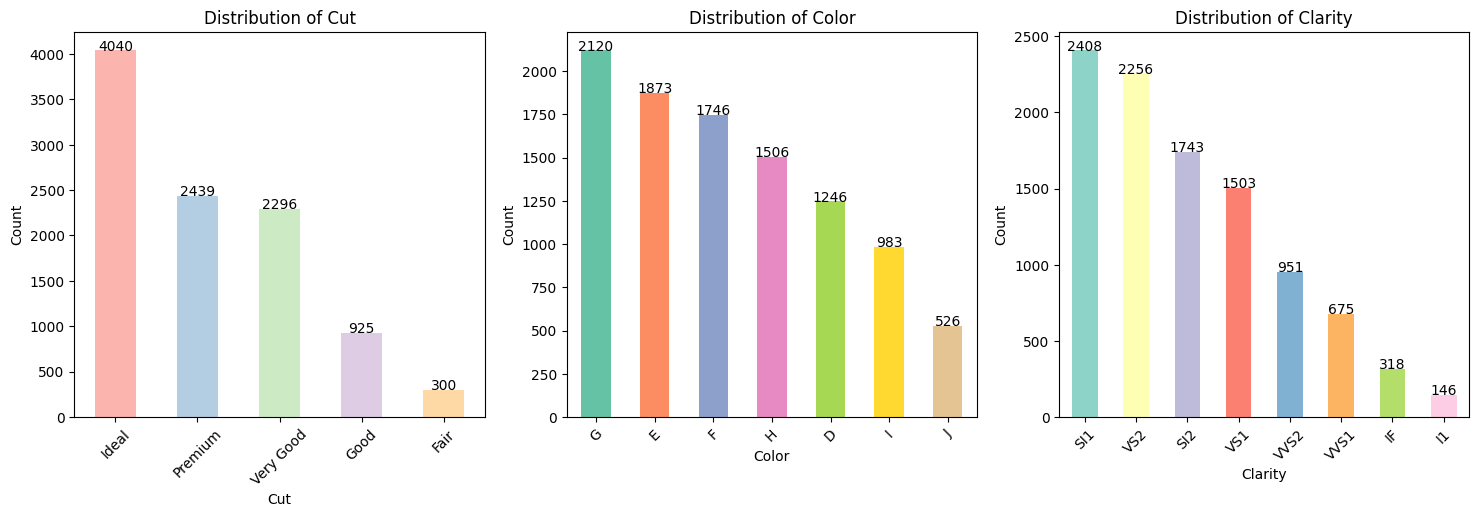

In [11]:
# Cut feature distribution
cut_counts = training_data['cut'].value_counts()
cut_percentages = training_data['cut'].value_counts(normalize=True) * 100

# Color feature distribution
color_counts = training_data['color'].value_counts()
color_percentages = training_data['color'].value_counts(normalize=True) * 100

# Clarity feature distribution
clarity_counts = training_data['clarity'].value_counts()
clarity_percentages = training_data['clarity'].value_counts(normalize=True) * 100

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Cut distribution
colors_cut = plt.cm.Pastel1(range(len(cut_counts)))
cut_counts.plot(kind='bar', ax=axes[0], color=colors_cut)
axes[0].set_title('Distribution of Cut')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(cut_counts):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontsize=10)

# Color distribution
colors_color = plt.cm.Set2(range(len(color_counts)))
color_counts.plot(kind='bar', ax=axes[1], color=colors_color)
axes[1].set_title('Distribution of Color')
axes[1].set_xlabel('Color')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(color_counts):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontsize=10)

# Clarity distribution
colors_clarity = plt.cm.Set3(range(len(clarity_counts)))
clarity_counts.plot(kind='bar', ax=axes[2], color=colors_clarity)
axes[2].set_title('Distribution of Clarity')
axes[2].set_xlabel('Clarity')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(clarity_counts):
    axes[2].text(i, v + 0.5, str(v), ha='center', fontsize=10)

In [12]:
# Entropy - Categorical Features
def calculate_entropy(series):
    value_counts = series.value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts + 1e-9))  # Adding a small constant to avoid log(0)
    return entropy

# Normalized Entropy
def calculate_normalized_entropy(series):
    entropy = calculate_entropy(series)
    max_entropy = np.log2(len(series.unique()))
    normalized_entropy = entropy / max_entropy if max_entropy > 0 else 0
    return normalized_entropy
# Calculate normalized entropy for each categorical feature
norm_entropy_cut = calculate_normalized_entropy(training_data['cut'])
norm_entropy_color = calculate_normalized_entropy(training_data['color'])
norm_entropy_clarity = calculate_normalized_entropy(training_data['clarity'])
print(f"Normalized Entropy of 'cut': {norm_entropy_cut:.4f}")
print(f"Normalized Entropy of 'color': {norm_entropy_color:.4f}")
print(f"Normalized Entropy of 'clarity': {norm_entropy_clarity:.4f}")

Normalized Entropy of 'cut': 0.8534
Normalized Entropy of 'color': 0.9635
Normalized Entropy of 'clarity': 0.8873


Categorical feature diversity.
Category balance was quantified using normalized Shannon entropy. The categorical variables cut, color, and clarity exhibited normalized entropy values of 0.85, 0.96, and 0.89 respectively, indicating good to very high category diversity with no extreme dominance by a single level. These results support the use of one-hot encoding without category merging and further suggest that entropy-based models, such as decision trees and boosting methods, are well suited to exploit these features.

# Numerical Features: Distribution, Scale, and Structure

This section examines the numeric features, focusing on scale, distributional properties, and potential redundancy.

In [13]:
# numerical features
numerical_features = training_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('outcome')  # Exclude target variable
print("All numerical features:", numerical_features)

interpretable = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
interpretable_data = training_data[interpretable]
print("Interpretable numerical features:", interpretable)
interpretable_data.head()

latent_features = [col for col in numerical_features if col not in interpretable]
latent_data = training_data[latent_features]
latent_data.head()
print("Latent numerical features:", latent_features)

All numerical features: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
Interpretable numerical features: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Latent numerical features: ['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


In [14]:
# SUmmary statistics for interpretable features
interpretable_summary = interpretable_data.describe().T
interpretable_summary['IQR'] = interpretable_summary['75%'] - interpretable_summary['25%']
interpretable_summary = interpretable_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]
print("Interpretable Numerical Features Summary:")
print(interpretable_summary.to_string())

Interpretable Numerical Features Summary:
         count         mean          std    min     25%      50%      75%       max      IQR
carat  10000.0     0.798407     0.472046    0.2    0.40     0.71     1.04      4.00     0.64
depth  10000.0    61.748060     1.429631   50.8   61.00    61.90    62.50     70.50     1.50
table  10000.0    57.467360     2.247036   44.0   56.00    57.00    59.00     73.00     3.00
price  10000.0  3910.841900  3940.369616  326.0  965.00  2441.00  5226.00  18791.00  4261.00
x      10000.0     5.733974     1.114850    0.0    4.73     5.70     6.53     10.01     1.80
y      10000.0     5.741665     1.228057    0.0    4.74     5.72     6.53     58.90     1.79
z      10000.0     3.540757     0.692502    0.0    2.92     3.53     4.03      8.06     1.11


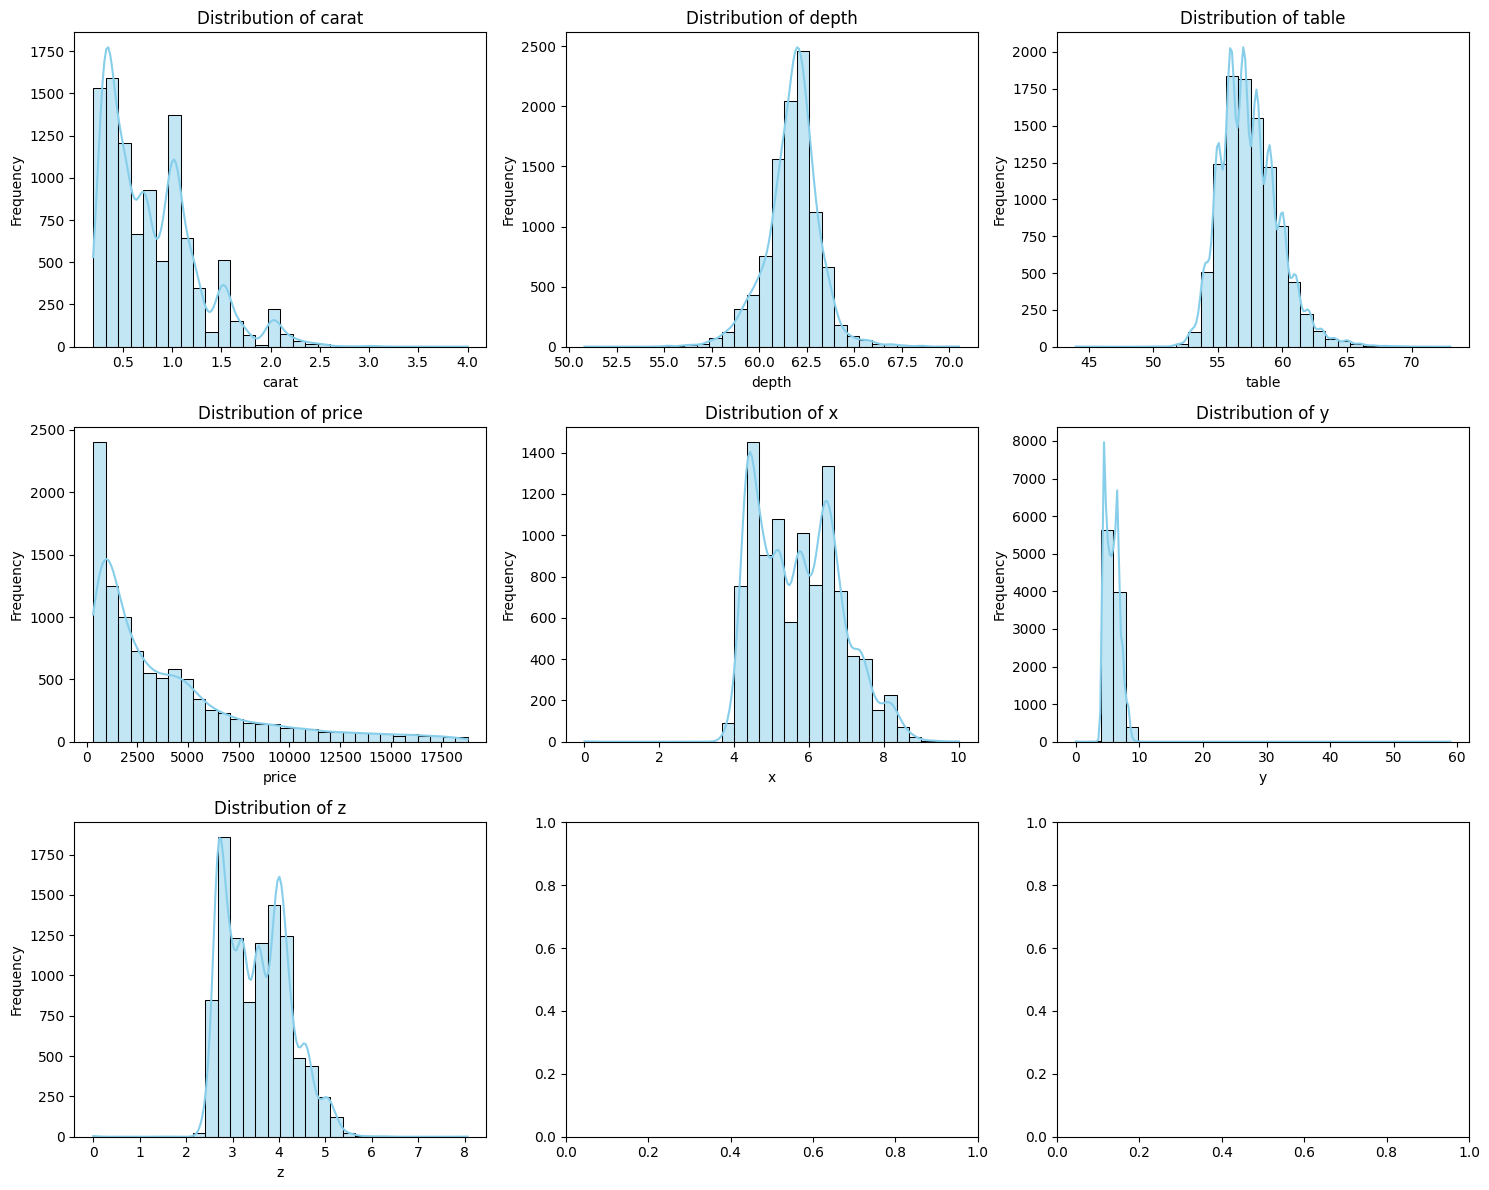

In [15]:
# Distribution plots for interpretable features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, feature in enumerate(interpretable):
    sns.histplot(interpretable_data[feature], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Numeric feature distributions.
Interpretable numeric features exhibit heterogeneous scales and pronounced skewness. In particular, price and carat display strong right-skewed distributions with long tails, while depth and table are tightly concentrated around their central values. The geometric dimensions (x, y, z) show substantial redundancy and occasional extreme values, suggesting multicollinearity rather than data corruption. These characteristics motivate feature scaling for linear models and favor nonlinear models capable of handling skewed and correlated inputs.

In [16]:
#Summary statistics for latent features
latent_summary = latent_data.describe().T
latent_summary['IQR'] = latent_summary['75%'] - latent_summary['25%']
latent_summary = latent_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]
print("Latent Numerical Features Summary:")
print(latent_summary.to_string())   

Latent Numerical Features Summary:
       count      mean       std       min       25%       50%       75%       max       IQR
a1   10000.0  0.502349  0.291012  0.000128  0.249922  0.502063  0.753191  0.999789  0.503270
a2   10000.0  0.507509  0.291207  0.000101  0.251350  0.510046  0.764731  0.999976  0.513381
a3   10000.0  0.503561  0.289080  0.000176  0.253052  0.505308  0.751173  0.999960  0.498121
a4   10000.0  0.501449  0.288287  0.000101  0.254204  0.501914  0.750727  0.999872  0.496523
a5   10000.0  0.500618  0.289008  0.000166  0.249160  0.500035  0.753462  0.999947  0.504302
b1   10000.0  0.500001  0.287718  0.000231  0.250781  0.502025  0.746049  0.999781  0.495268
b2   10000.0  0.500075  0.289193  0.000048  0.247083  0.500868  0.753943  0.999929  0.506861
b3   10000.0  0.500901  0.290479  0.000045  0.247653  0.504009  0.753614  0.999859  0.505961
b4   10000.0  0.503297  0.286463  0.000032  0.260335  0.502572  0.754412  0.999844  0.494076
b5   10000.0  0.499672  0.288709  0

Latent numeric features.
The synthetic latent features exhibit two distinct distributional patterns. Features a1–a5 and b1–b5 are approximately uniformly distributed on 
[0,1]
[0,1], with means near 0.5 and similar interquartile ranges, while features a6–a10 and b6–b10 follow approximately standard normal distributions centered at zero. This indicates that the outcome is driven by a mixture of bounded and Gaussian latent factors, motivating the use of flexible nonlinear models capable of capturing heterogeneous latent structure.

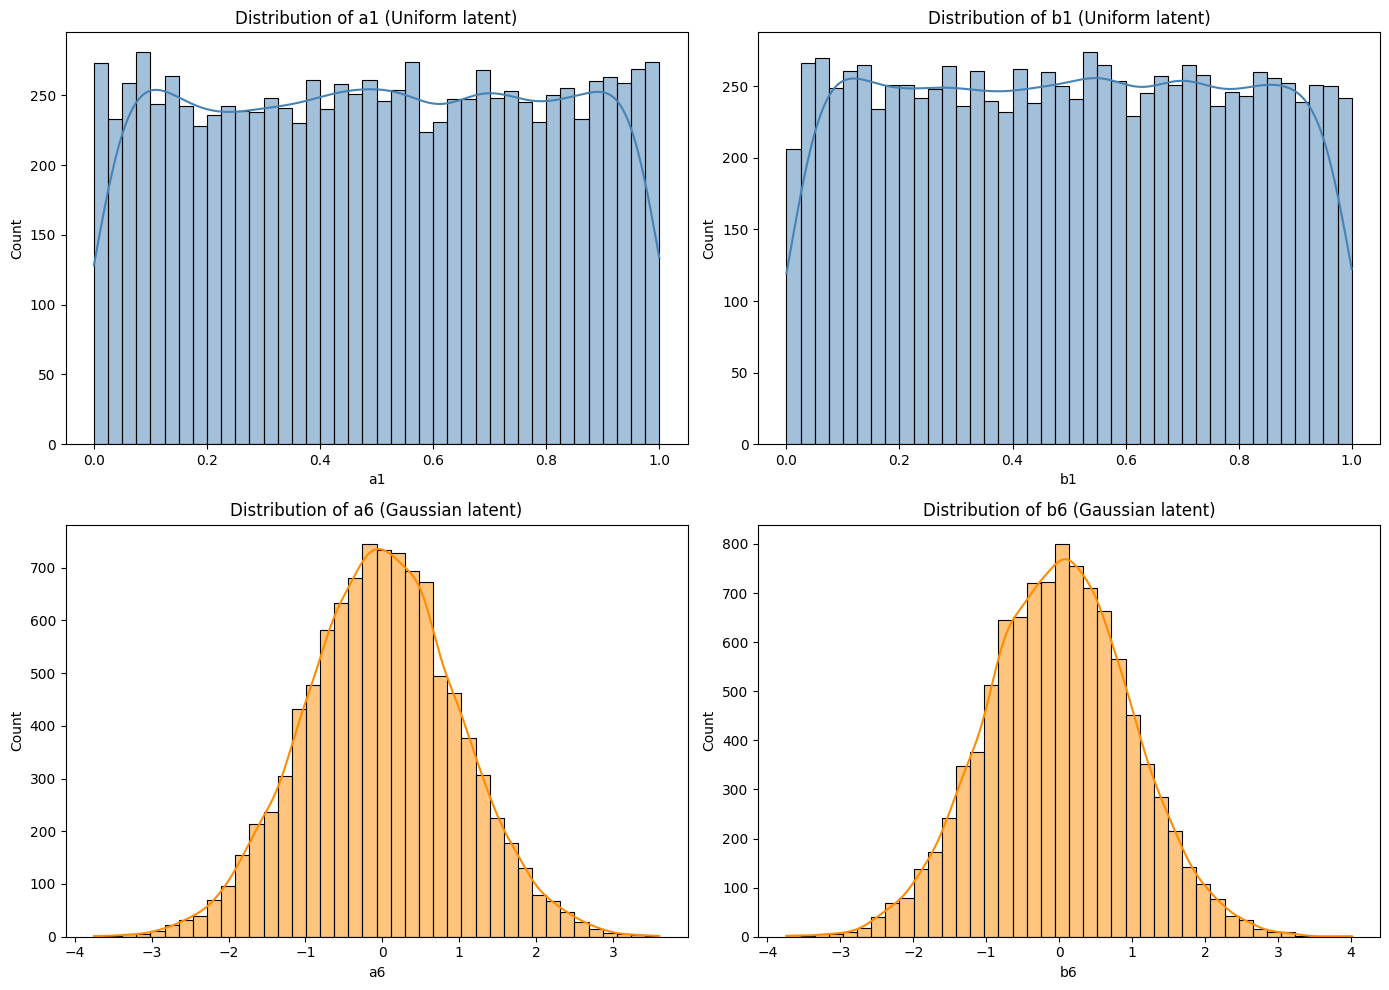

In [17]:
latent_uniform = ['a1', 'b1']
latent_gaussian = ['a6', 'b6']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Uniform latent features
for i, feature in enumerate(latent_uniform):
    sns.histplot(
        latent_data[feature],
        bins=40,
        kde=True,
        ax=axes[0, i],
        color='steelblue'
    )
    axes[0, i].set_title(f'Distribution of {feature} (Uniform latent)')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel('Count')

# Gaussian latent features
for i, feature in enumerate(latent_gaussian):
    sns.histplot(
        latent_data[feature],
        bins=40,
        kde=True,
        ax=axes[1, i],
        color='darkorange'
    )
    axes[1, i].set_title(f'Distribution of {feature} (Gaussian latent)')
    axes[1, i].set_xlabel(feature)
    axes[1, i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Latent numeric feature distributions.
Representative latent features confirm two distinct distributional families. Features such as a1 and b1 are approximately uniformly distributed on 
[0,1]
[0,1], while features such as a6 and b6 follow symmetric, approximately standard normal distributions. This confirms the presence of heterogeneous latent factors in the data-generating process and motivates the use of flexible nonlinear models capable of capturing interactions between bounded and unbounded latent variables.

# Correlation Analysis

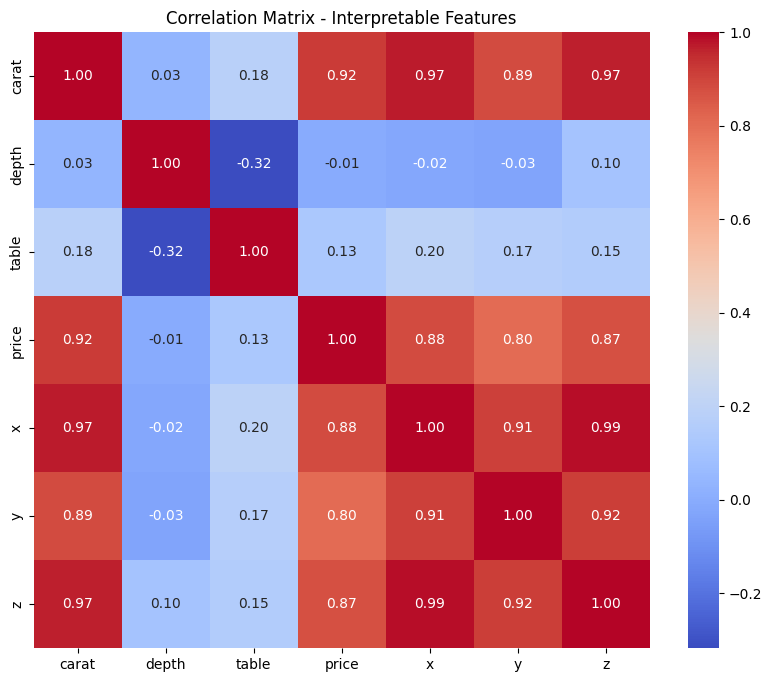

In [18]:
# Interpretable feature correlations
interpretable_corr = interpretable_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(interpretable_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix - Interpretable Features')
plt.show()

“Interpretable features show a strong multicollinearity cluster involving carat, price, and the geometric variables (x, y, z), with correlations as high as 0.99 (x–z), indicating substantial redundancy.”

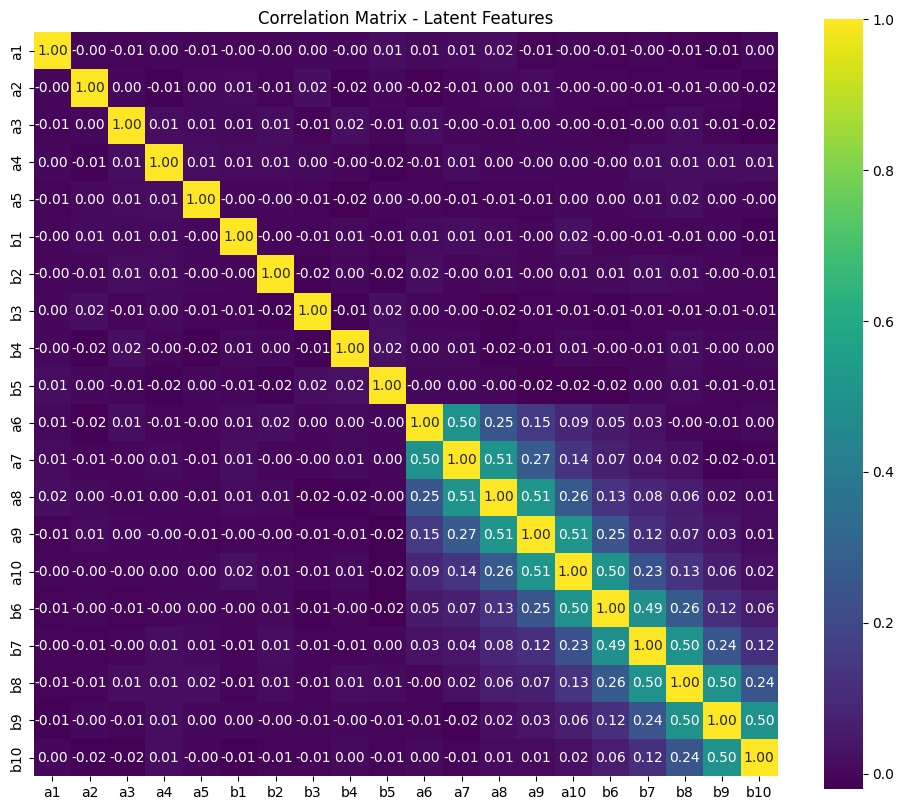

In [19]:
# Latent feature correlations
latent_corr = latent_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(latent_corr, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title('Correlation Matrix - Latent Features')
plt.show()

Latent features exhibit two regimes: near-independence among the bounded uniform variables (a1–a5, b1–b5) and a moderate correlation block among Gaussian latent variables (a6–a10, b6–b10), consistent with structured latent factor generation.

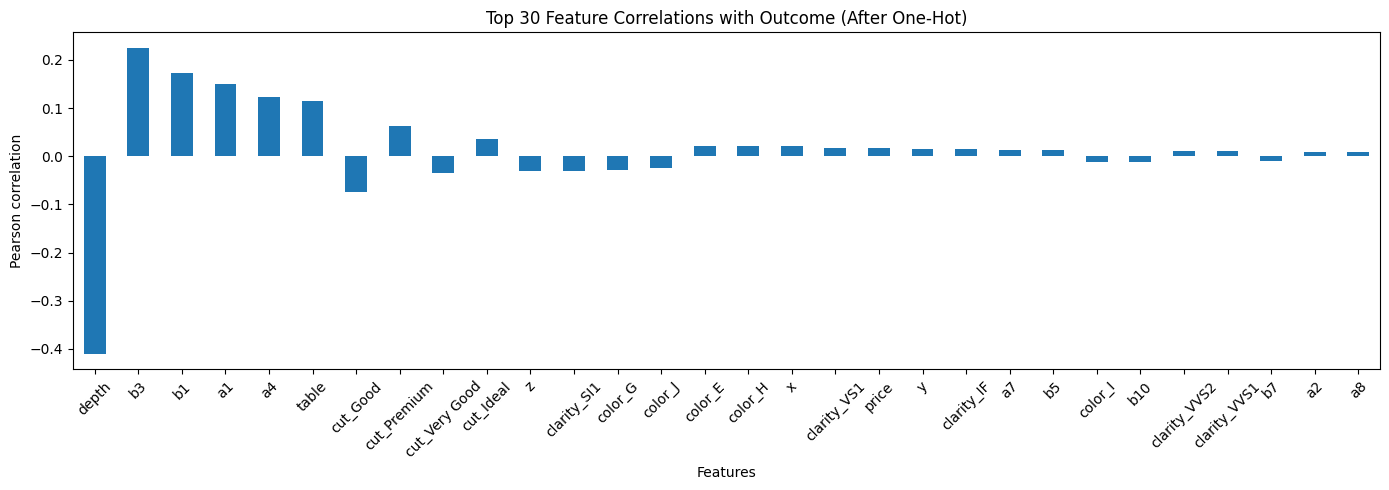

In [23]:
# One-hot encode categoricals, then correlate all numeric columns with outcome
df_encoded = pd.get_dummies(training_data, columns=['cut','color','clarity'], drop_first=True)

feature_target_corr = df_encoded.corr(numeric_only=True)['outcome'].drop('outcome')

plt.figure(figsize=(14, 5))
feature_target_corr.reindex(feature_target_corr.abs().sort_values(ascending=False).head(30).index)\
                  .plot(kind='bar')
plt.title('Top 30 Feature Correlations with Outcome (After One-Hot)')
plt.xlabel('Features')
plt.ylabel('Pearson correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature–target correlations.
Marginal Pearson correlations indicate that several latent variables exhibit stronger linear associations with the target than physical or categorical features. Interpretable numeric variables such as price and geometric dimensions show weak marginal correlations, despite strong inter-feature correlations, suggesting nonlinear or interaction-based effects. Overall, predictive signal appears distributed across multiple latent factors, motivating the use of flexible nonlinear models.